In [1]:
from library.objective_function import *
from library.optimiser import *
from library.post_analysis import *
from library.experiments import *
%matplotlib notebook
np.set_printoptions(formatter={'float': lambda x: "{0:5.6f}".format(x)})
SEED = 23191

## optimise one dimension function

In [2]:
ak_1d = ackley(dim=1) 

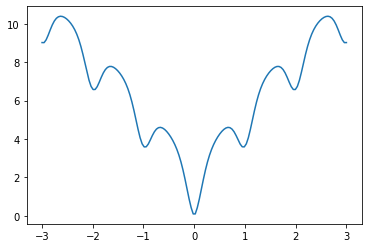

In [3]:
ak_1d.visualise1d(lim=3, n=150)

### line search 

### two failed cases

In [105]:
ls = line_search()
x0 = np.array([12.64232])
optmizerParas = {'x0': x0,
         'alpha': 10,
         'beta': 0.01, 
         'max_iter': 30,
         'tol': 1e-3,              
         'verbose': True,
         'record': True }
ls.set_parameters(optmizerParas)
arg, val, stats = ls.optimise(ak_1d)

[2.300248]

*******starting optimisation from intitial point:  [12.642320]
total evaluatios = 31
gradient at stop position = [-0.000251]
found minimum position = [12.997227], found minimum = 18.514116917921566


<IPython.core.display.Javascript object>


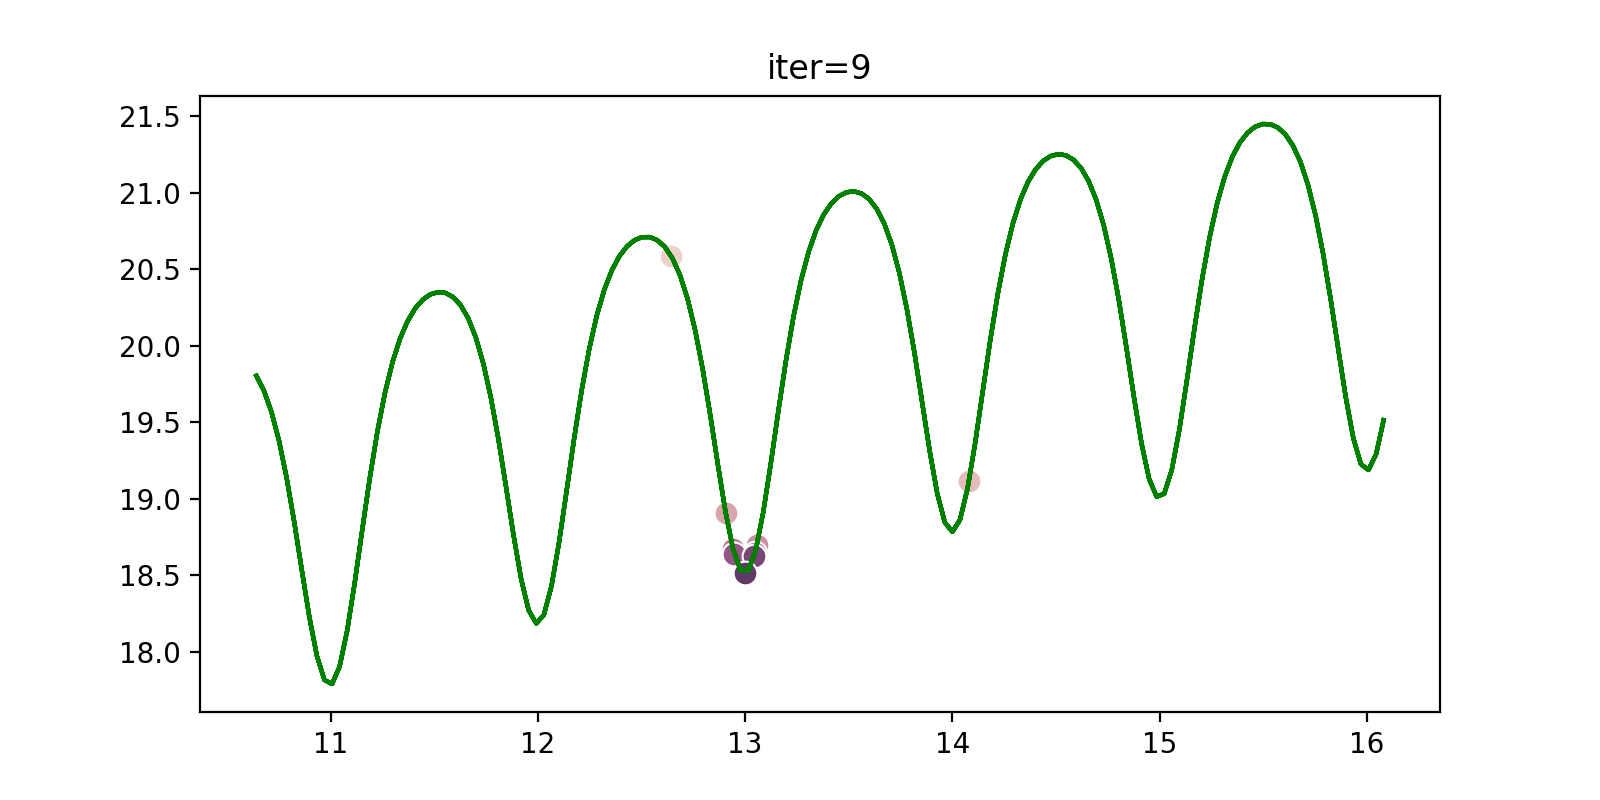

In [106]:
ana = post_analy1d(stats, ak_1d)
ana.animate_moving_position()

In [122]:
ls = line_search()
x0 = np.array([12.04232])
optmizerParas = {'x0': x0,
         'alpha': 2,
         'beta': 0.01, 
         'max_iter': 30,
         'tol': 1e-3,              
         'verbose': True,
         'record': True }
ls.set_parameters(optmizerParas)
arg, val, stats = ls.optimise(ak_1d)

[-4.692994]

*******starting optimisation from intitial point:  [12.042320]
total evaluatios = 34
gradient at stop position = [0.000977]
found minimum position = [2.979233], found minimum = 9.001093482916406


<IPython.core.display.Javascript object>


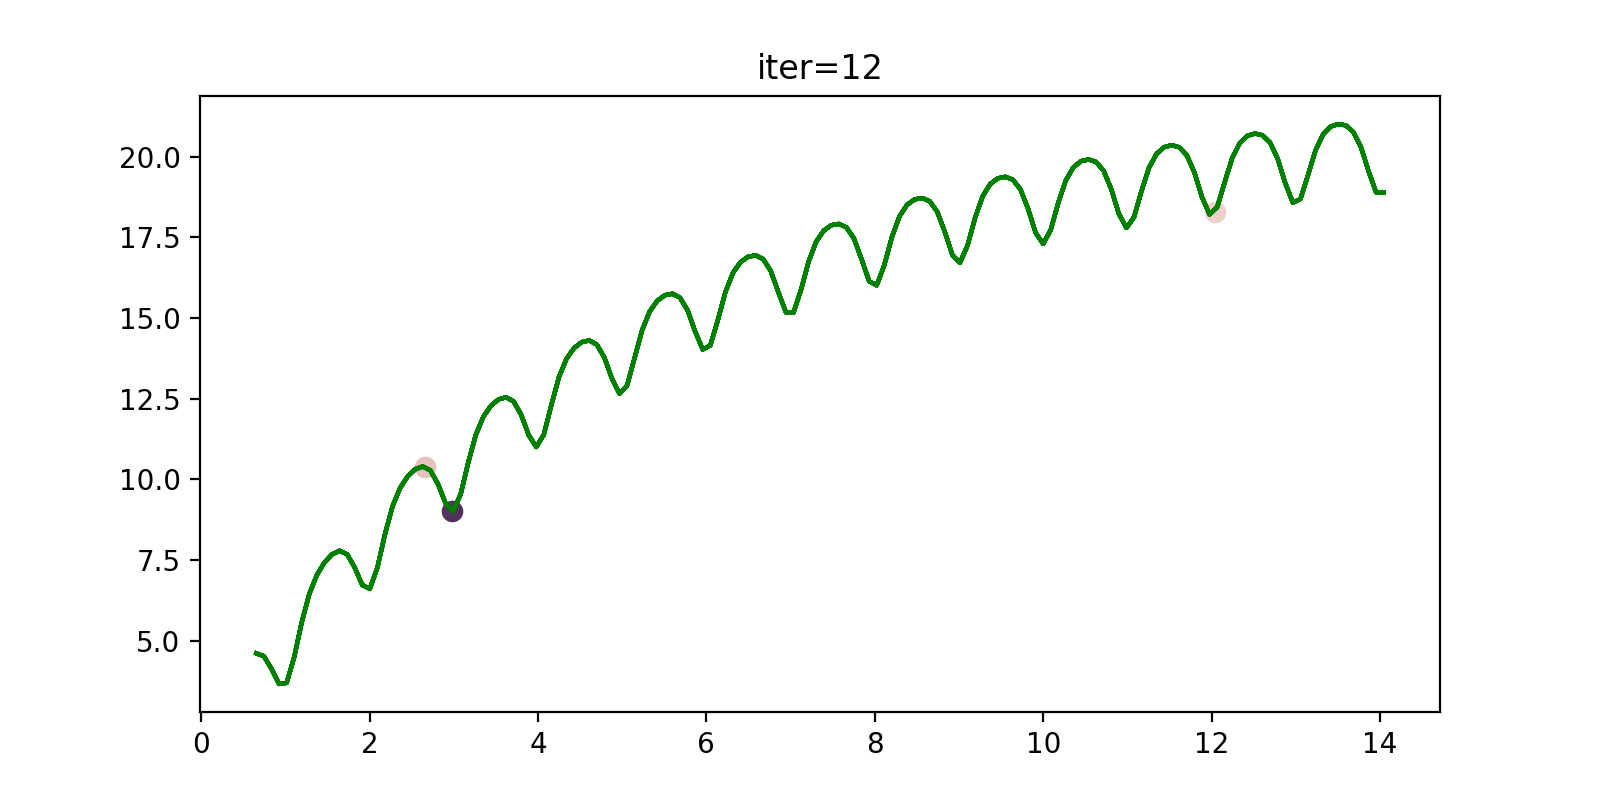

In [123]:
ana = post_analy1d(stats, ak_1d)
ana.animate_moving_position()

### successful case 

In [110]:
ls = line_search()
x0 = np.array([42.24232])
optmizerParas = {'x0': x0,
         'alpha': 10,
         'beta': 0.01, 
         'max_iter': 30,
         'tol': 1e-3,              
         'verbose': True,
         'record': True }
ls.set_parameters(optmizerParas)
arg, val, stats = ls.optimise(ak_1d)

[-6.586872]

*******starting optimisation from intitial point:  [42.242320]
total evaluatios = 30
gradient at stop position = [0.000000]
found minimum position = [-0.000040], found minimum = 0.0001592027513521721


<IPython.core.display.Javascript object>


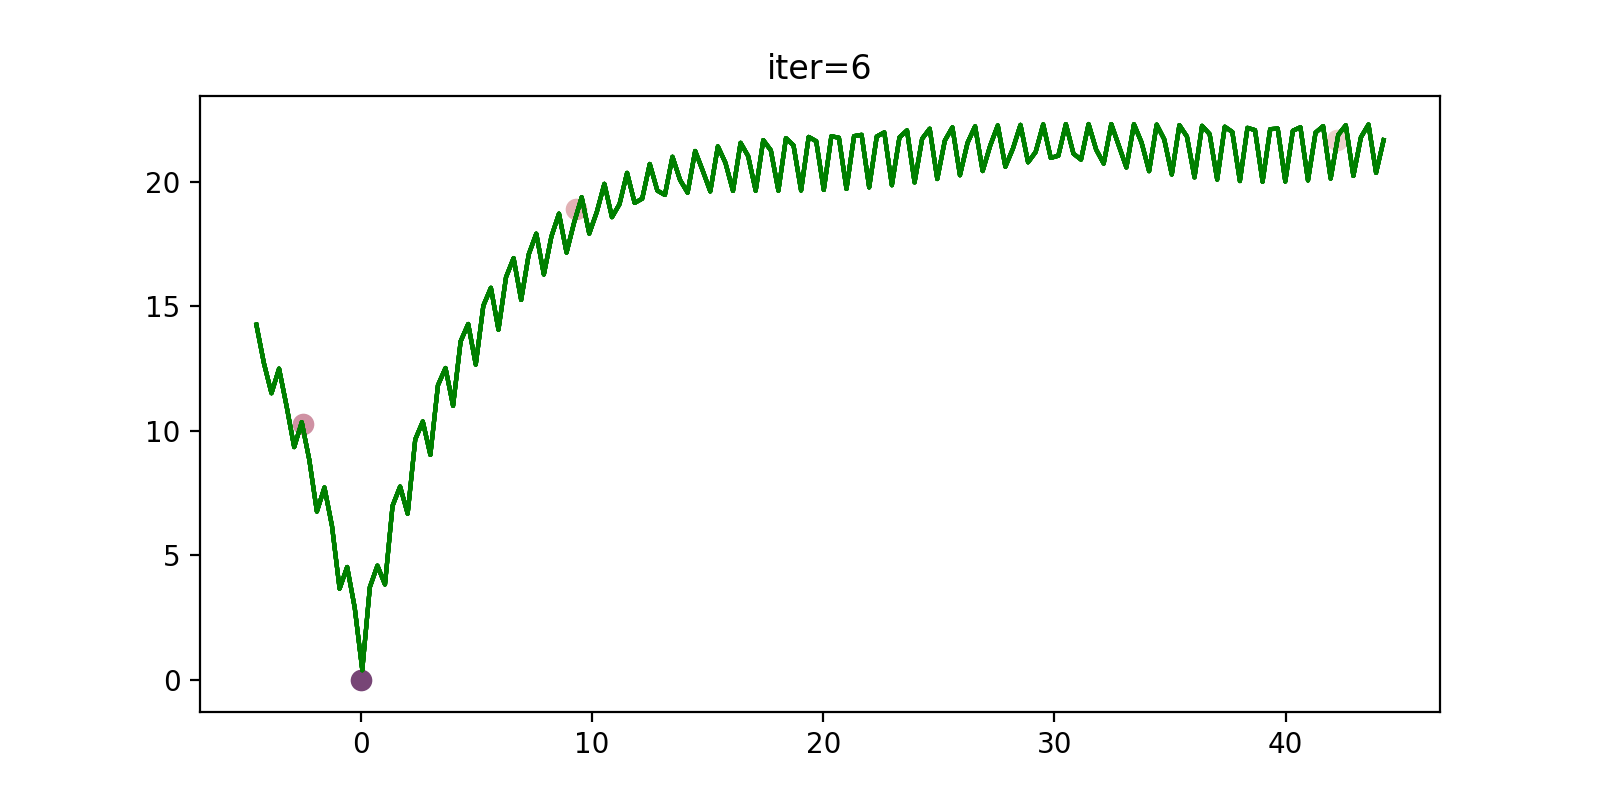

In [111]:
ana = post_analy1d(stats, ak_1d)
ana.animate_moving_position()

remark:

large alpha(step size), little beta(threshold) is beneficial to search more globally

### adam
### one successful case

In [131]:
ad = adam()
x0 = np.array([52.34232])
optmizerParas = {
         'x0': x0,
         'alpha': 0.8,
         'beta_1': 0.9, 
         'beta_2': 0.999, 
         'epsilon': 1e-11, 
         'max_iter': 200,
         'tol': 1e-3,              
         'verbose': True,
         'record': True }
ad.set_parameters(optmizerParas)
arg, val, stats = ad.optimise(ak_1d)



*******starting optimisation from intitial point:  [52.342320]
total evaluatios = 175
gradient at stop position = [-0.443355],
modified graident = [-0.000622]
found minimum position = [-0.972435], found minimum = 3.5752277570691047


<IPython.core.display.Javascript object>


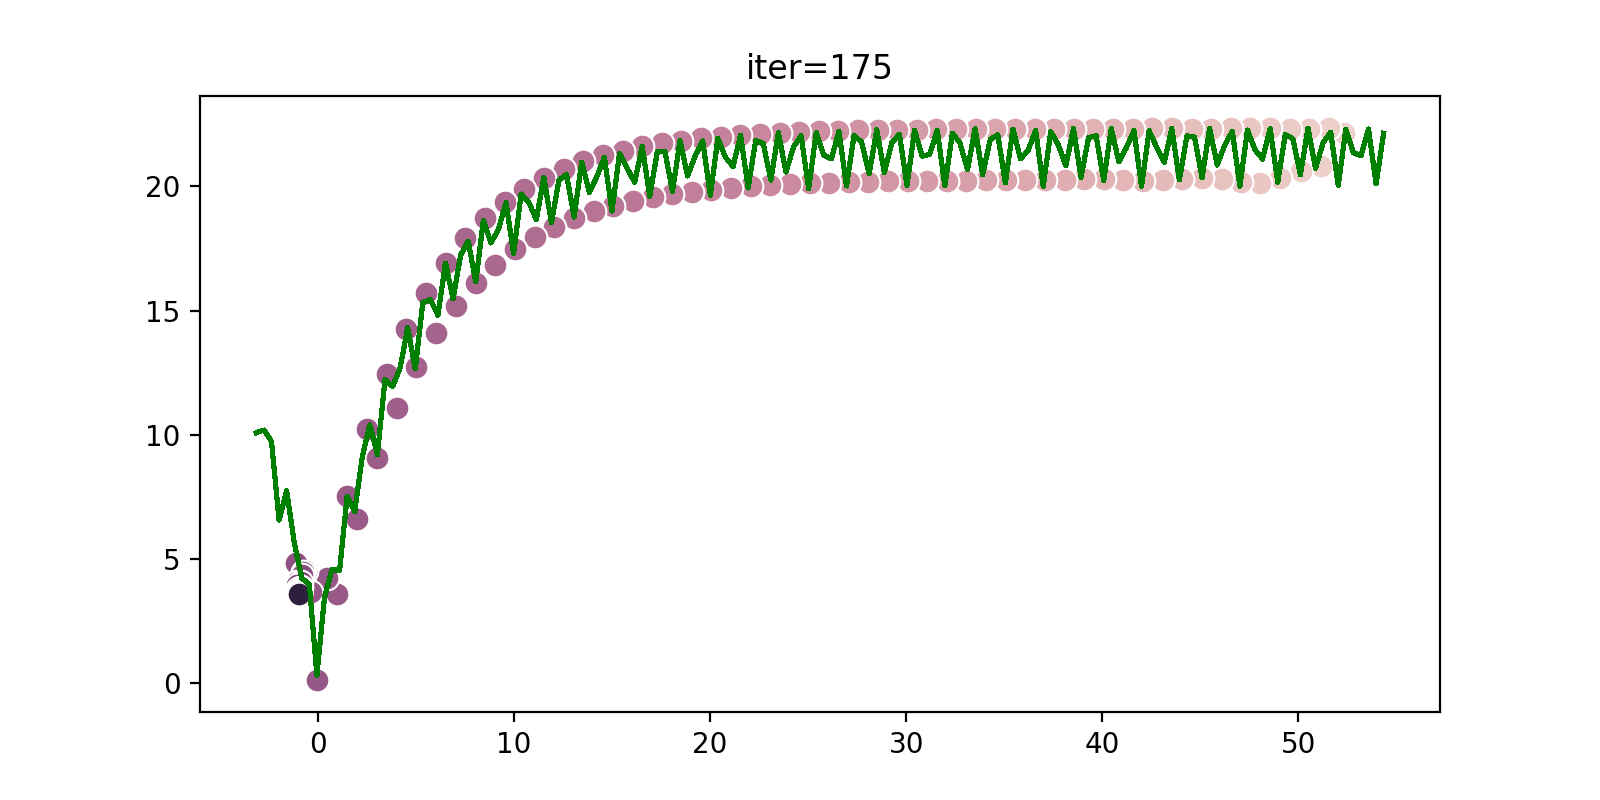

In [132]:
ana = post_analy1d(stats, ak_1d)
ana.animate_moving_position()

### two typical scenarios where adam fails

In [92]:
ad = adam()
x0 = np.array([12.64232])
optmizerParas = {
         'x0': x0,
         'alpha': 0.8,
         'beta_1': 0.9, 
         'beta_2': 0.999, 
         'epsilon': 1e-11, 
         'max_iter': 100,
         'tol': 1e-3,              
         'verbose': True,
         'record': True }
ad.set_parameters(optmizerParas)
arg, val, stats = ad.optimise(ak_1d)



*******starting optimisation from intitial point:  [12.642320]
total evaluatios = 48
gradient at stop position = [-1.732633],
modified graident = [-0.000023]
found minimum position = [13.981430], found minimum = 18.797693502901357


remark:

alpha slightly smaller than period is beneficial escape from local minimum

<IPython.core.display.Javascript object>


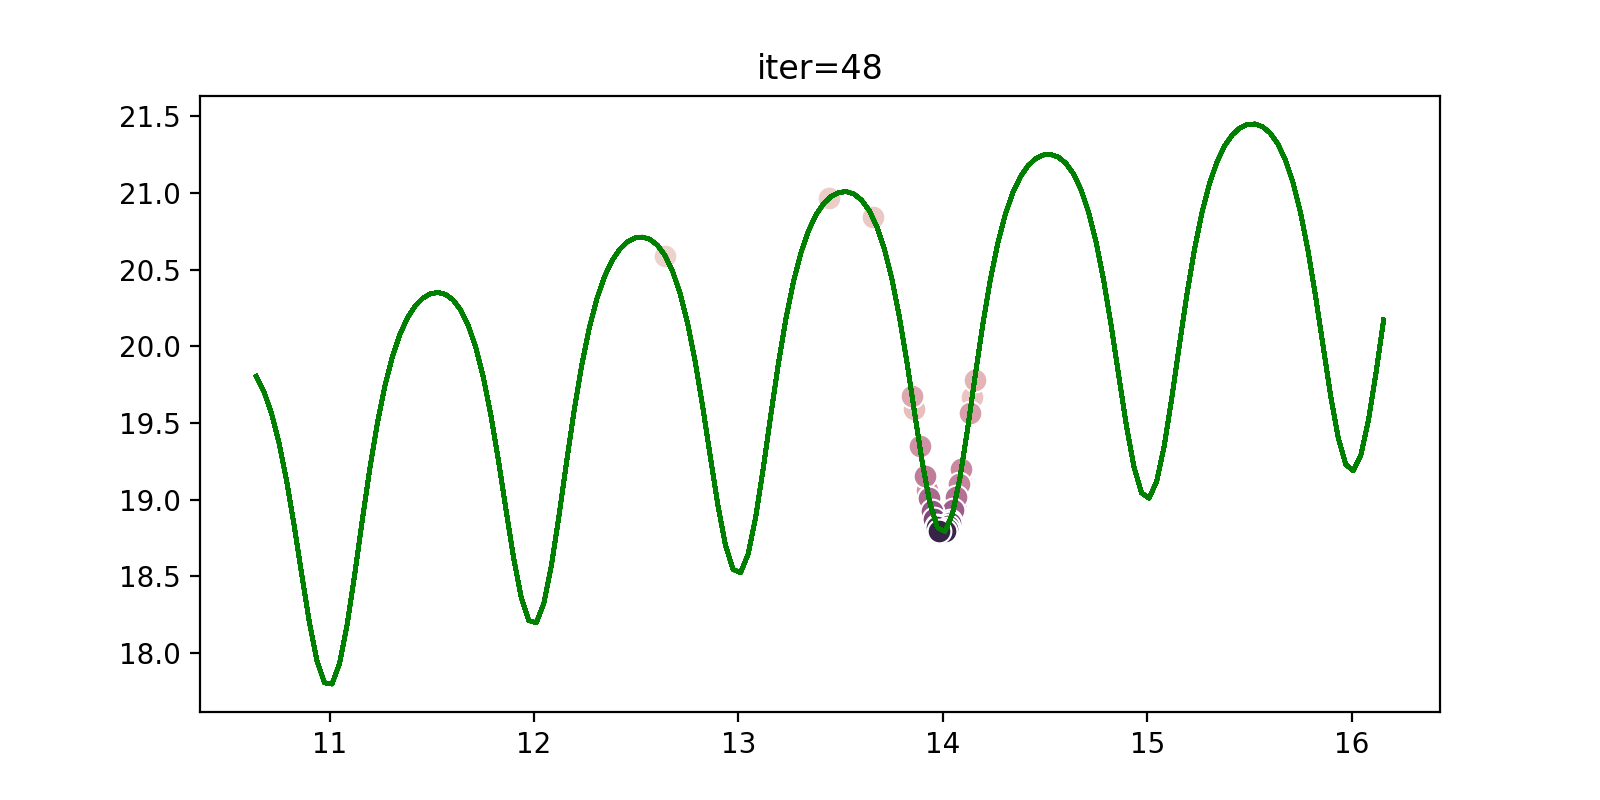

In [93]:
ana = post_analy1d(stats, ak_1d)
ana.animate_moving_position()

In [96]:
ad = adam()
x0 = np.array([12.24232])
optmizerParas = {
         'x0': x0,
         'alpha': 0.8,
         'beta_1': 0.9, 
         'beta_2': 0.999, 
         'epsilon': 1e-11, 
         'max_iter': 100,
         'tol': 1e-3,              
         'verbose': True,
         'record': True }
ad.set_parameters(optmizerParas)
arg, val, stats = ad.optimise(ak_1d)



*******starting optimisation from intitial point:  [12.242320]
total evaluatios = 18
gradient at stop position = [-6.309286],
modified graident = [0.001224]
found minimum position = [10.926909], found minimum = 18.018851852364694


<IPython.core.display.Javascript object>


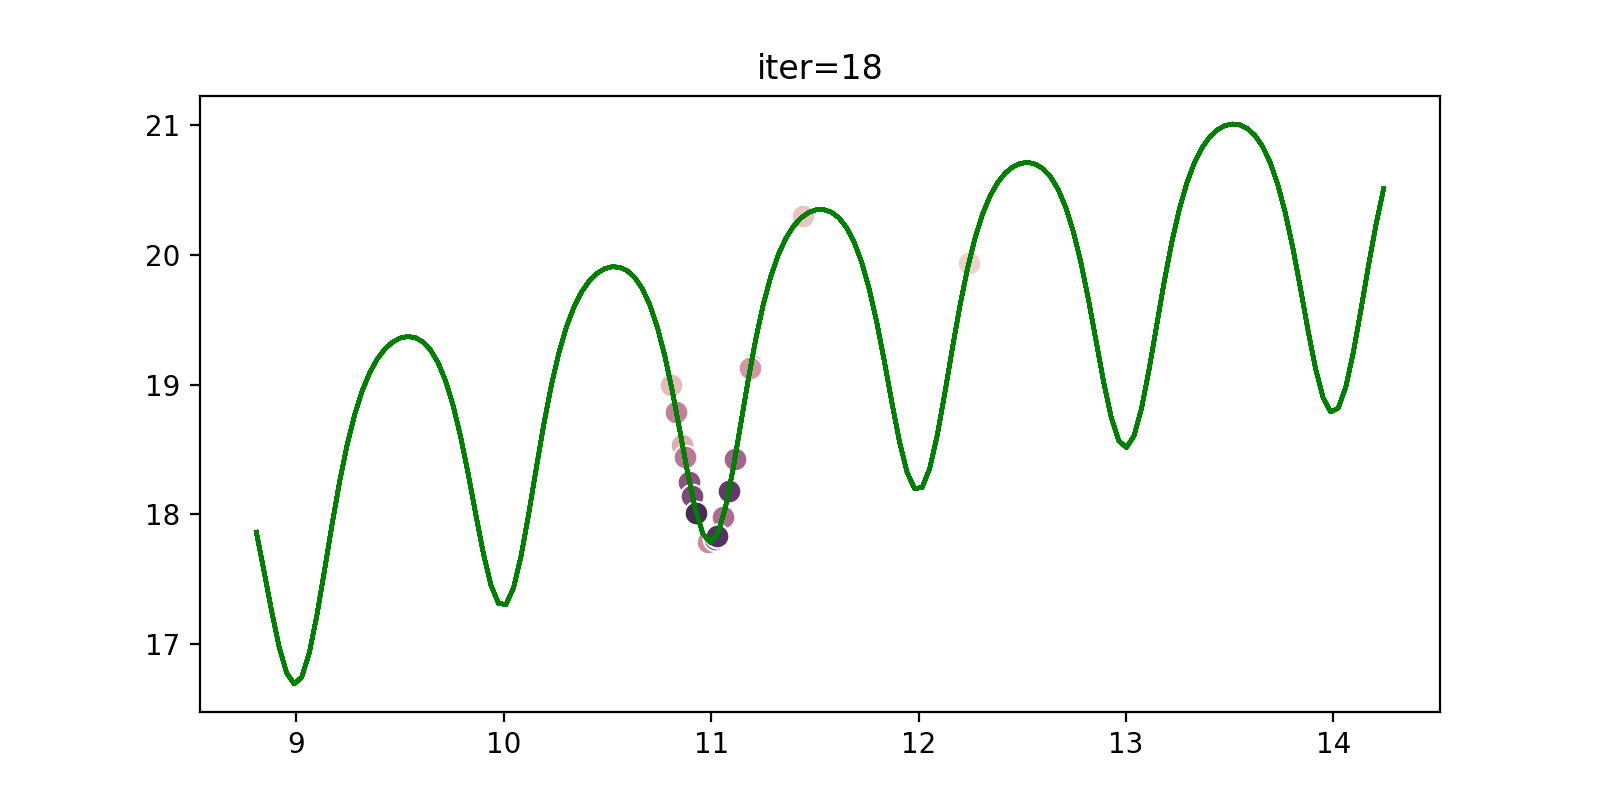

In [97]:
ana = post_analy1d(stats, ak_1d)
ana.animate_moving_position()

### cma

In [24]:
cma = cma_es(dim=1)
x0 = np.array([12.34232])
paras = {'x0': x0,
         'std': np.ones((1,)) * 3, 
         'tol': 1e-1, 
         'adjust_func': do_nothing(), 
         'record': True, 
         'verbose': True}
cma.set_parameters(paras)
arg, val, stats = cma.optimise(ak_1d)



*******starting optimisation from intitial mean:  [12.342320]
eigenvalue of variance = [0.817638]
total iterations = 18, total evaluatios = 72
found minimum position = [-0.009330], found minimum = 0.041949911930082795


<IPython.core.display.Javascript object>


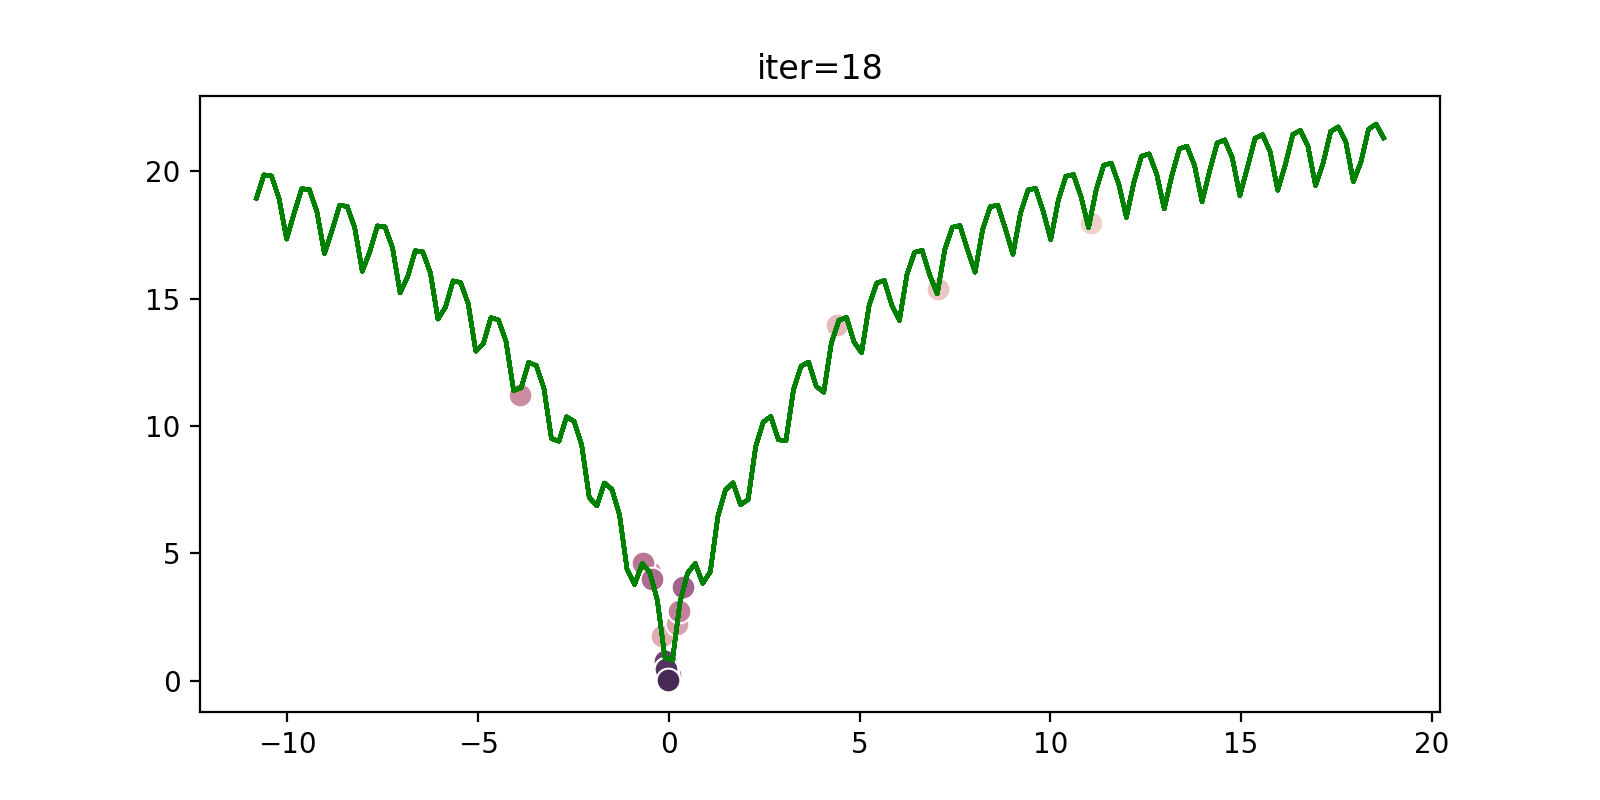

In [25]:
ana_cma = post_analy1d(stats, ak_1d)
ana_cma.animate_moving_position()

<IPython.core.display.Javascript object>


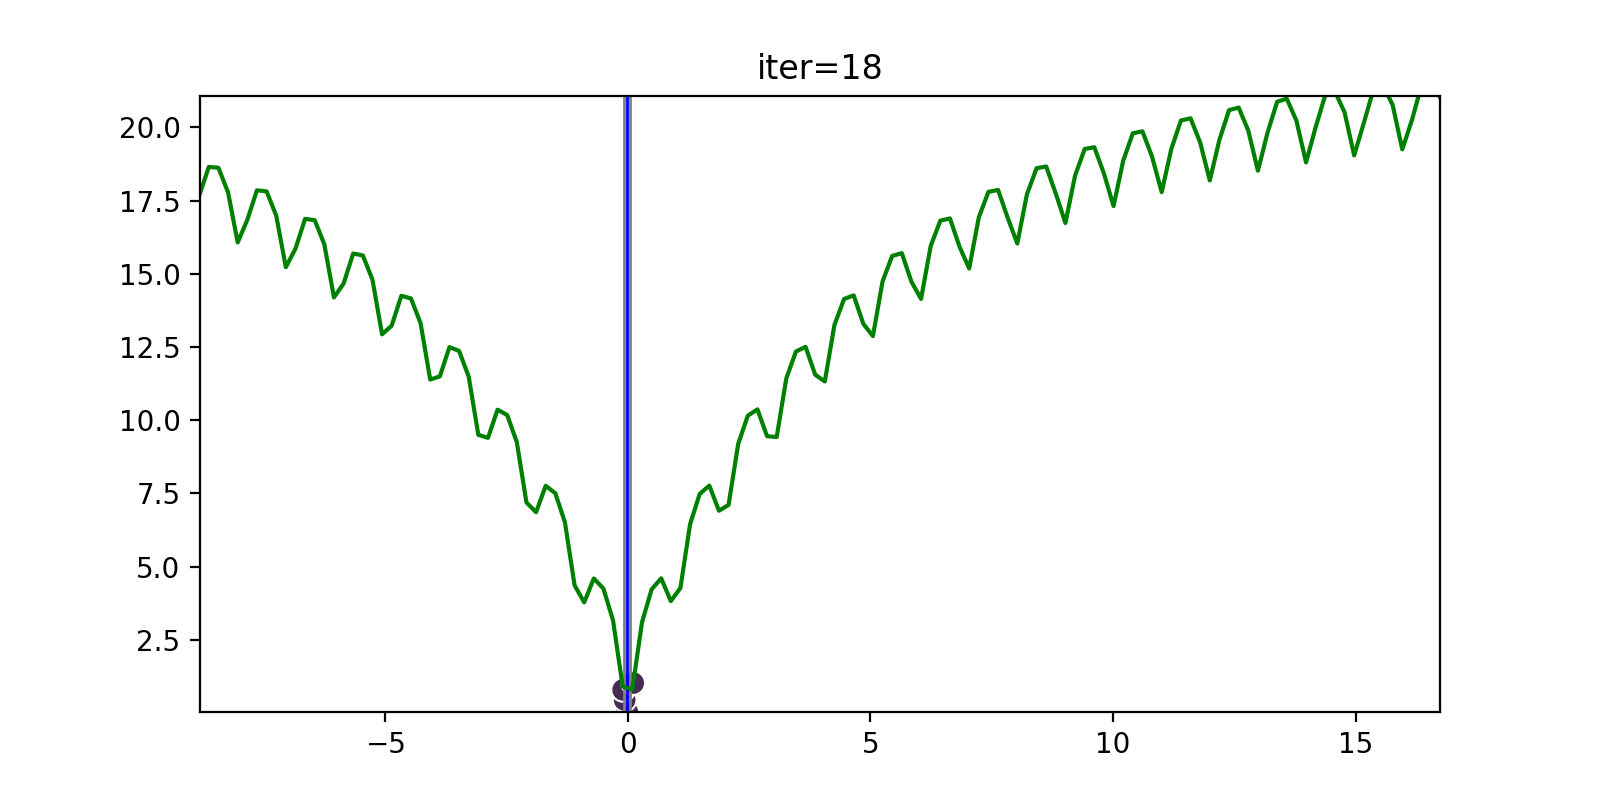

In [26]:
ana_cma = post_analy1d(stats, ak_1d)
ana_cma.animate_moving_cluster()

## failed case

In [27]:
np.random.seed(111321)
cma = cma_es(dim=1)
x0 = np.array([102.34232])
paras = {'x0': x0,
         'std': np.ones((1,)) * 30, 
         'tol': 1e-1, 
         'adjust_func': do_nothing(), 
         'record': True, 
         'verbose': True}
cma.set_parameters(paras)
arg, val, stats = cma.optimise(ak_1d)



*******starting optimisation from intitial mean:  [102.342320]
eigenvalue of variance = [1.523675]
total iterations = 40, total evaluatios = 160
found minimum position = [101.024177], found minimum = 20.031124461425435


<IPython.core.display.Javascript object>


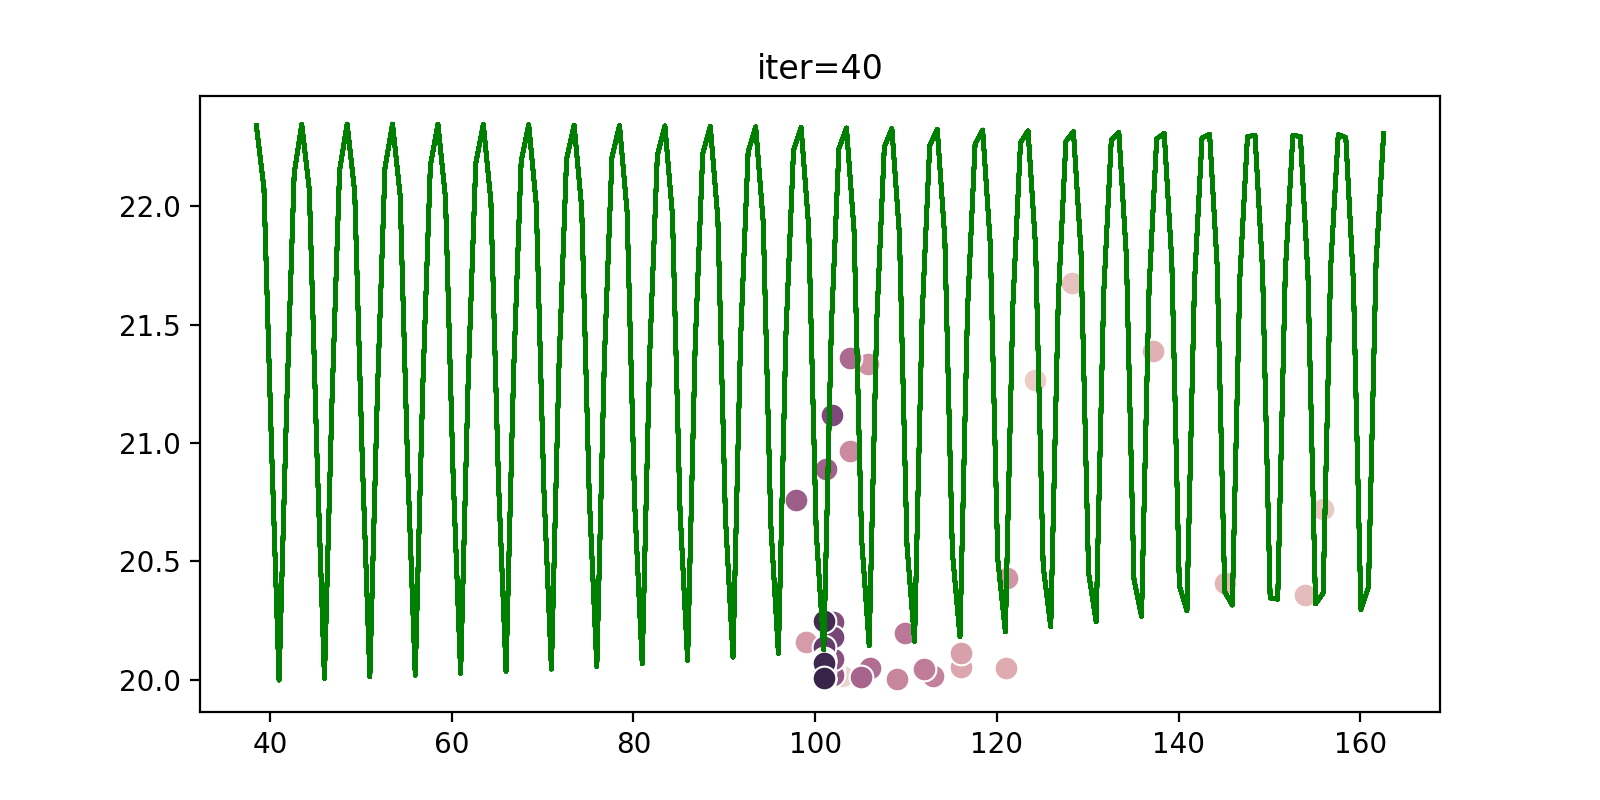

In [28]:
ana_cma = post_analy1d(stats, ak_1d)
ana_cma.animate_moving_position()

### turn it to success with only inserting line_search inner optimizer

In [29]:
np.random.seed(111321)
cma = cma_es(dim=1)
x0 = np.array([102.34232])
paras = {'x0': x0,
         'std': np.ones((1,)) * 30, 
         'tol': 1e-1, 
         'adjust_func': line_search(), 
         'record': True, 
         'verbose': True}
cma.set_parameters(paras)
arg, val, stats = cma.optimise(ak_1d)



*******starting optimisation from intitial mean:  [102.342320]
eigenvalue of variance = [7.970095]
total iterations = 16, total evaluatios = 2099
found minimum position = [0.000359], found minimum = 0.0014429238087356744


<IPython.core.display.Javascript object>


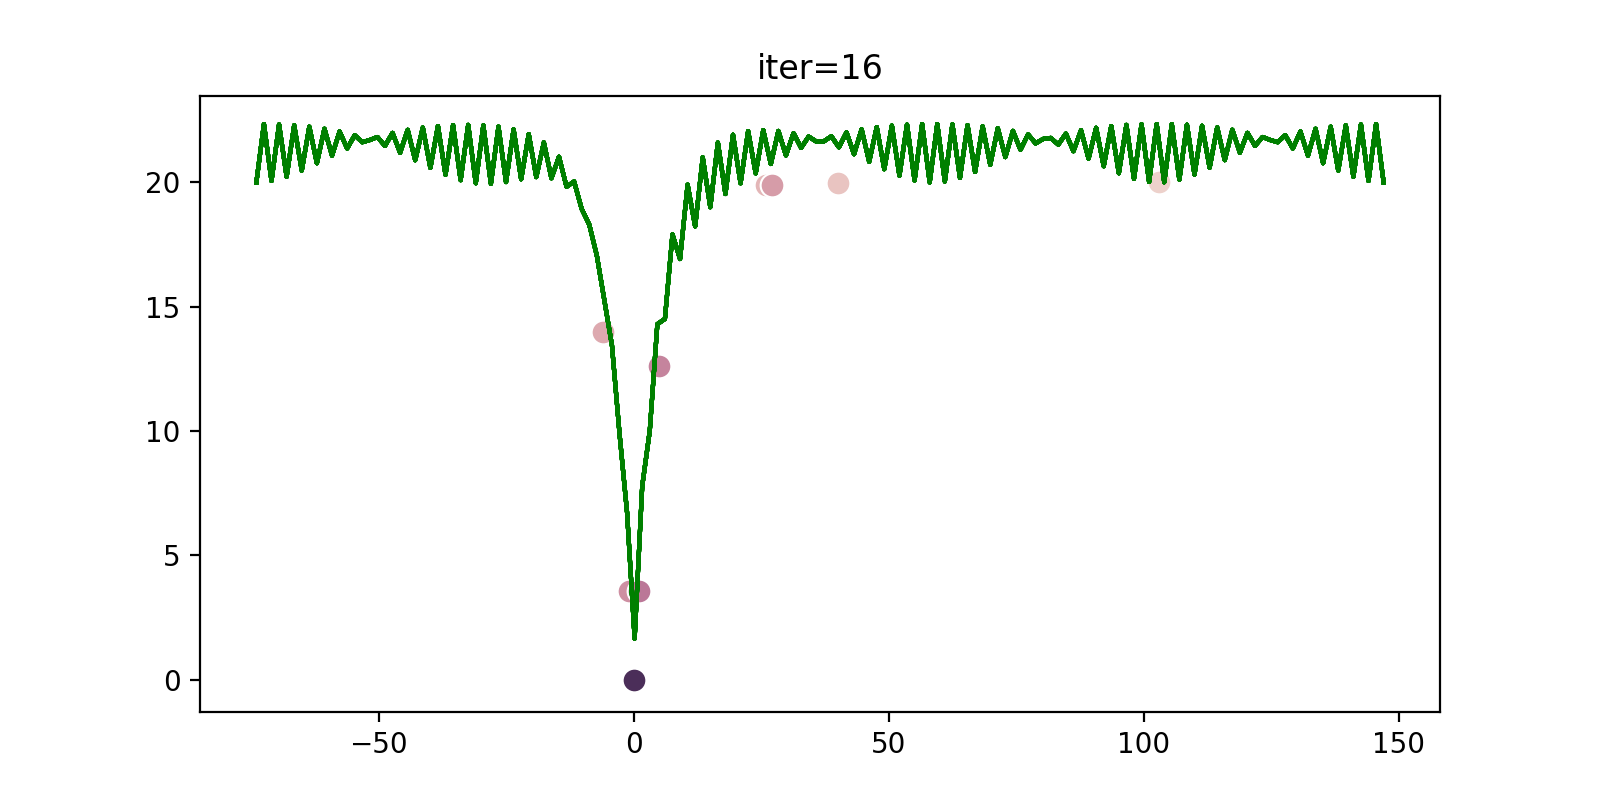

In [30]:
ana_cma = post_analy1d(stats, ak_1d)
ana_cma.animate_moving_position()

<IPython.core.display.Javascript object>


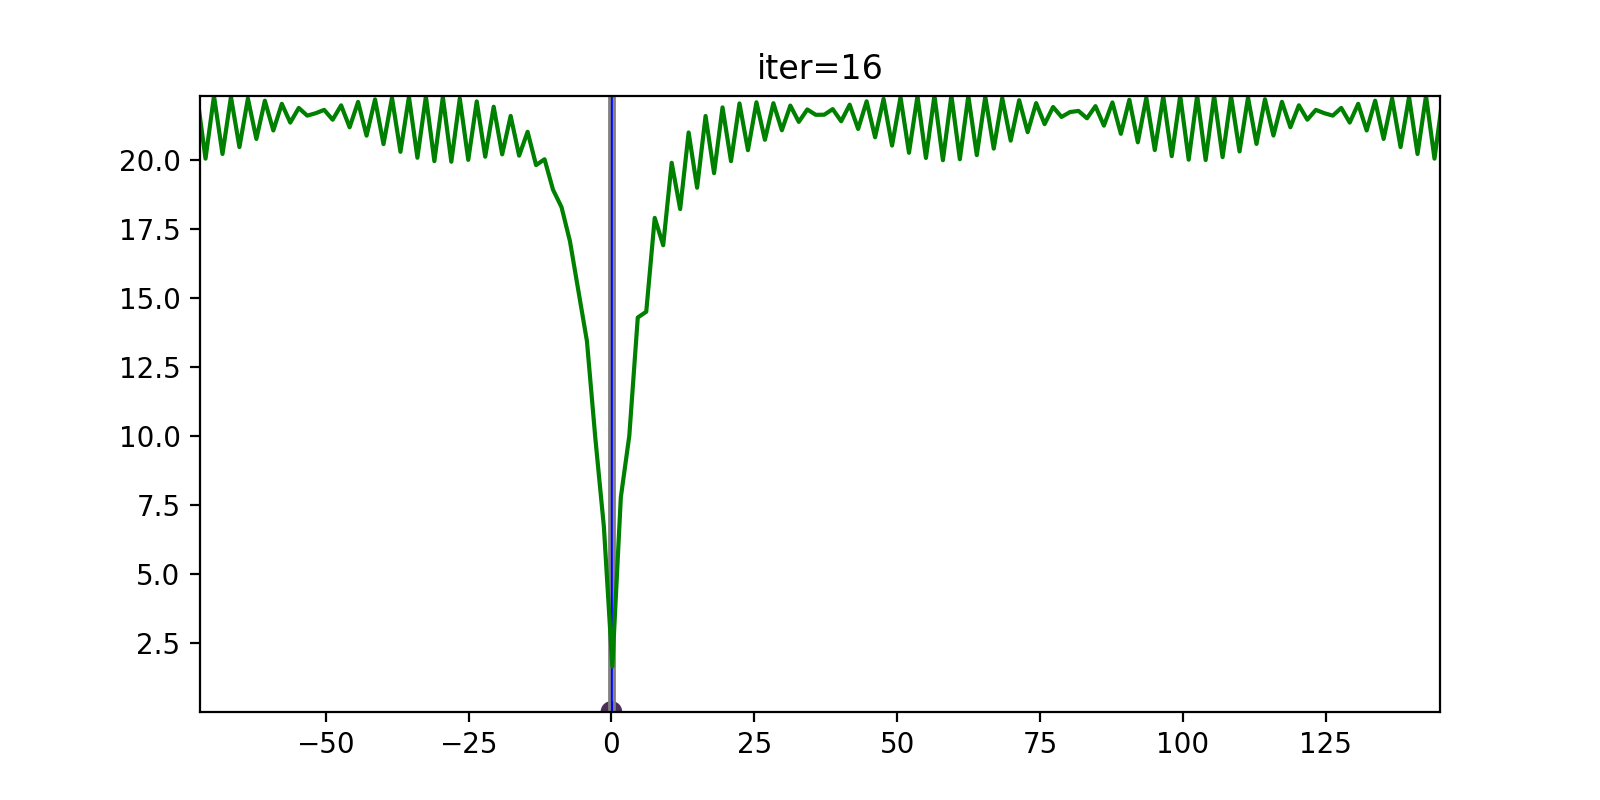

In [31]:
ana_cma.animate_moving_cluster()

# find the best setp size of Adam, on Ackley 1D

## ackley

In [15]:
class adjust_optimizer(optimizer):
    def adjust(self, x0, obj):
        self.x0 = x0
        arg, val, stats = self.optimise(obj)
        return arg, val, stats['evals']
class adam(adjust_optimizer):
    def __init__(self, dim=2, verbose=False):
        self.alpha = 0.01
        self.beta_1 = 0.9
        self.beta_2 = 0.999
        self.epsilon = 1e-8
        self.max_iter = 10000
        self.tol = 1e-2
        self.verbose = verbose
        self.record = False
        self.x0 = np.zeros((dim,))
        
    def set_parameters(self, paras):
        self.paras = paras
        self.x0 = paras['x0']
        self.alpha = paras['alpha']
        self.beta_1 = paras['beta_1']
        self.beta_2 = paras['beta_2']
        self.epsilon = paras['epsilon']
        self.max_iter = paras['max_iter']
        self.tol = paras['tol']
        self.verbose = True if 'verbose' not in paras.keys() else paras['verbose']
        self.record = False if 'record' not in paras.keys() else paras['record']
        
    def optimise(self, obj):
        m_t = 0 
        v_t = 0 
        eval_cnt = 0
        x = self.x0.copy().ravel()
        stats = {}
        stats['status'] = None
        stats['gradient_before_after'] = []
        stats['arg'] = []
        stats['val'] = []
        if self.record:
            stats['arg'].append(x.copy())
            stats['val'].append(obj.func(x))
            stats['gradient_before_after'].append([obj.dfunc(x), obj.dfunc(x)])
        if self.verbose:
            print("\n*******starting optimisation from intitial position: ", self.x0.ravel())
        while eval_cnt < self.max_iter:					#till it gets converged
            eval_cnt += 1
            g_t = obj.dfunc(x)		#computes the gradient of the stochastic function
            m_t = self.beta_1*m_t + (1-self.beta_1)*g_t	#updates the moving averages of the gradient
            v_t = self.beta_2*v_t + (1-self.beta_2)*(g_t*g_t)	#updates the moving averages of the squared gradient
            m_cap = m_t/(1-(self.beta_1**eval_cnt))		#calculates the bias-corrected estimates
            v_cap = v_t/(1-(self.beta_2**eval_cnt))		#calculates the bias-corrected estimates
            x_prev = x.copy()								
            est_df = (m_cap)/(np.sqrt(v_cap)+self.epsilon)
            x -= self.alpha * est_df 	#updates the parameters
            if self.record:
                stats['arg'].append(x.copy())
                stats['val'].append(obj.func(x))
                stats['gradient_before_after'].append([g_t, est_df])
            if(np.linalg.norm(x-x_prev) < self.tol):		#checks if it is converged or not
                break
        if self.verbose:
            print('total evaluatios = {}'.format(eval_cnt))
            print('gradient at stop position = {},\nmodified graident = {}'.format(g_t, est_df))
            print('found minimum position = {}, found minimum = {}'.format(x, obj.func(x)))
        stats['arg'] = np.array(stats['arg'])
        stats['val'] = np.array(stats['val'])
        stats['gradient_before_after'] = np.array(stats['gradient_before_after'])
        stats['evals'] = eval_cnt
        return x, obj.func(x), stats

In [16]:
class adam_inner_alpha(adam):
    # override the method of parent class
    def adjust(self, alpha, obj):
        self.alpha = alpha
        print("\n starting optimisation from intitial parameter: ", alpha)
        arg, val, stats = self.optimise(obj)
        return alpha, val, stats['evals']

In [8]:
np.random.seed(111321)

ad_alpha = adam_inner_alpha()
x0 = np.array([52.34232])
optmizerParas = {
         'x0': x0,
         'alpha': 0.8,
         'beta_1': 0.9, 
         'beta_2': 0.999, 
         'epsilon': 1e-11, 
         'max_iter': 200,
         'tol': 1e-3,              
         'verbose': False,
         'record': False }
ad_alpha.set_parameters(optmizerParas)

cma = cma_es(dim=1)
alpha0 = np.array([1.34232])
paras = {'x0': alpha0,
         'std': np.ones((1,)) * 0.5, 
         'tol': 1e-2, 
         'max_iter': 50,
         'adjust_func': ad_alpha, 
         'cluster_size': 10,
         'record': True, 
         'verbose': True}
cma.set_parameters(paras)
arg, val, stats = cma.optimise(ak_1d)



*******starting optimisation from intitial mean:  [1.342320]

  [[1.342320]] 


  [[1.159104]] 


  [[1.113460]] 


  [[1.057604]] 


  [[1.120628]] 


  [[1.137398]] 


  [[1.101432]] 


  [[1.082376]] 


  [[1.109887]] 


  [[1.097205]] 


  [[1.099462]] 


  [[1.093848]] 


  [[1.089212]] 


  [[1.090142]] 


  [[1.086581]] 


  [[1.090197]] 


  [[1.089348]] 


  [[1.085016]] 


  [[1.084664]] 


  [[1.080399]] 


  [[1.080788]] 


  [[1.082700]] 


  [[1.077203]] 


  [[1.077535]] 


  [[1.076297]] 


  [[1.074466]] 


  [[1.078621]] 


  [[1.076492]] 


  [[1.074667]] 


  [[1.077877]] 


  [[1.077224]] 


  [[1.078736]] 


  [[1.078009]] 


  [[1.076875]] 

eigenvalue of variance = [0.074146]
total iterations = 34, total evaluatios = 42997
found minimum position = [1.075330], found minimum = 15.063635543784091


In [30]:
ad = adam()
x0 = np.array([68.2542])
optmizerParas = {
         'x0': x0,
         'alpha': 0.8,
         'beta_1': 0.9, 
         'beta_2': 0.999, 
         'epsilon': 1e-11, 
         'max_iter': 200,
         'tol': 1e-3,              
         'verbose': True,
         'record': True }
ad.set_parameters(optmizerParas)
arg, val, stats = ad.optimise(ak_1d)


*******starting optimisation from intitial position:  [68.254200]
total evaluatios = 57
gradient at stop position = [-0.427731],
modified graident = [-0.000127]
found minimum position = [66.996114], found minimum = 20.000779677705662


In [17]:
ad = adam()
x0 = np.array([52.34232])
optmizerParas = {
         'x0': x0,
         'alpha': alpha0,
         'beta_1': 0.9, 
         'beta_2': 0.999, 
         'epsilon': 1e-11, 
         'max_iter': 200,
         'tol': 1e-3,              
         'verbose': True,
         'record': True }
ad.set_parameters(optmizerParas)
arg, val, stats = ad.optimise(ak_1d)


*******starting optimisation from intitial position:  [52.342320]
total evaluatios = 92
gradient at stop position = [0.234569],
modified graident = [0.000121]
found minimum position = [47.002020], found minimum = 19.9985651243599


In [29]:
ad = adam()
x0 = np.array([68.2542])
optmizerParas = {
         'x0': x0,
         'alpha': 1.075330,
         'beta_1': 0.9, 
         'beta_2': 0.999, 
         'epsilon': 1e-11, 
         'max_iter': 200,
         'tol': 1e-3,              
         'verbose': True,
         'record': True }
ad.set_parameters(optmizerParas)
arg, val, stats = ad.optimise(ak_1d)


*******starting optimisation from intitial position:  [68.254200]
total evaluatios = 187
gradient at stop position = [0.293852],
modified graident = [0.000007]
found minimum position = [-8.991079], found minimum = 16.692384330802685


## bukin

In [ ]:
for i in range(0, 10):
    # One experiment: setup optimizer
    ad = adam()
    optmizerParas = {'x0': np.zeros((2,)),
             'alpha': 0.01* np.power(0.1, i),
             'beta_1': 0.9, 
             'beta_2': 0.999, 
             'epsilon': 1e-8, 
             'max_iter': 1000,
             'tol': 1e-2,              
             'verbose': True,
             'record': False}
    ad.set_parameters(optmizerParas)
    exp.set_optimizer(ad)

    # Multiple experiment: setup one expreiment
    exps_bk_ad.set_single_exp(exp)


    # Multiple experiments: setup sample zone of multiple experiments
    zoneParas = {'origin': np.array([-15, -5]),
                 'edge': np.array([30, 10]),
                 'step': 10,
                 'size': 10,
                 'sym': False}
    exps_bk_ad.set_sample_zone(zoneParas)

    %time data_bk_ad = exps_bk_ad.do()